In [56]:
import numpy as np
import scipy.optimize as sp
from astropy.timeseries import LombScargle
import matplotlib.pyplot as plt
import pandas as pd
import astropy.units as u

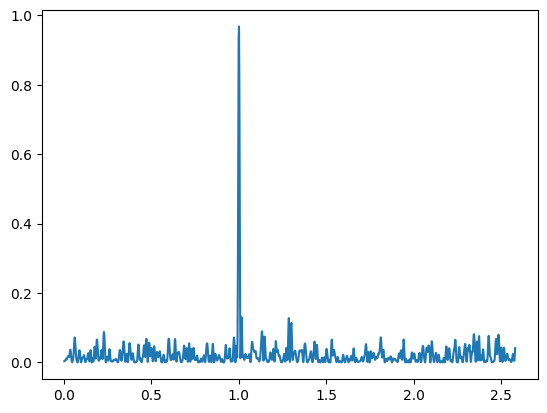

In [4]:
rand = np.random.default_rng(42)
t = 100 * rand.random(100)
y = np.sin(2 * np.pi * t) + 0.1 * rand.standard_normal(100)

frequency, power = LombScargle(t, y).autopower()
plt.plot(frequency, power)

In [5]:
df = pd.read_csv('Master_Data.csv')

In [6]:
df

,Cadence (Burst),JD_UTC,av_rel_flux T1,av_rel_flux C2,av_rel_flux C3,av_rel_flux C4,av_rel_flux C5,std_T1,std_C2,std_C3,std_C4,std_C5,CoV T1,CoV C2,CoV C3,CoV C4,CoV C5
0,9-1,2458634.522,0.456628,0.233339,0.339823,0.326439,0.451546,0.002471,0.000887,0.002142,0.002114,0.002726,0.54115,0.37997,0.63035,0.64751,0.60380
1,1-2,2458577.078,0.450170,0.228931,0.339605,0.335194,0.447539,0.002006,0.001622,0.002960,0.003196,0.003580,0.44550,0.70851,0.87161,0.95335,0.80001
2,1-3,2458578.134,0.450683,0.228680,0.340786,0.331198,0.451231,0.003543,0.001859,0.002193,0.002973,0.004438,0.78622,0.81300,0.64345,0.89761,0.98360
3,1-4,2458579.073,0.443331,0.227401,0.341038,0.337236,0.445611,0.002052,0.001855,0.004357,0.002738,0.004142,0.46282,0.81586,1.27755,0.81188,0.92961
4,1-5,2458580.129,0.455698,0.230386,0.337893,0.331528,0.451841,0.001656,0.001190,0.001391,0.002025,0.002493,0.36350,0.51657,0.41154,0.61085,0.55166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,25-2,2458772.319,0.448605,0.228226,0.346733,0.314918,0.464618,0.002445,0.000960,0.001108,0.002206,0.002236,0.54492,0.42065,0.31969,0.70064,0.48121
77,25-5,2458775.310,0.464657,0.229137,0.344663,0.318101,0.461843,0.001035,0.001213,0.001444,0.001581,0.002703,0.22272,0.52943,0.41903,0.49709,0.58524
78,25-6,2458776.310,0.468700,0.231277,0.346630,0.313944,0.461648,0.001667,0.000976,0.001777,0.003936,0.003895,0.35564,0.42185,0.51270,1.25377,0.84377
79,26-3,2458781.313,0.470187,0.229390,0.346115,0.312454,0.467016,0.005155,0.004178,0.005852,0.011035,0.011951,1.09639,1.82156,1.69085,3.53160,2.55910


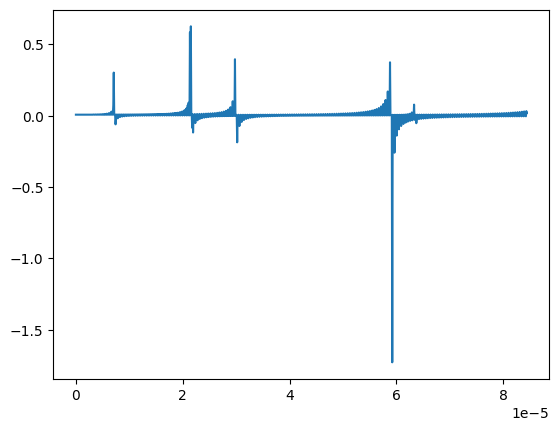

In [42]:
time = df['JD_UTC'] * u.day
flux = df['av_rel_flux T1']
error = df['std_T1']

# add a sine wave to comp stars and try to reproduce artifacts
# target star with similar mag and add sine waves at same period as cyg x-1 as a simulation
# plot amplitude squared to alleviate negative power

frequency, power = LombScargle(time, flux, dy=error).autopower()
max_power = frequency[np.argmax(power)]  
min_power = frequency[np.argmin(power)]  
plt.plot(frequency, power)

In [40]:
print(max_power)
print(min_power)

2.1540280490381342e-05
5.9204523359442715e-05


Text(0, 0.5, 'Flux')

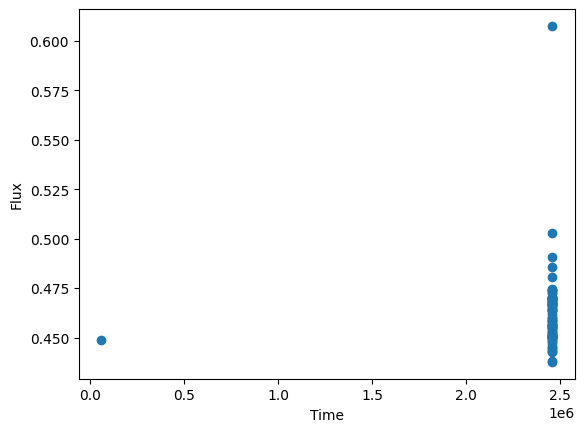

In [36]:
time = df['JD_UTC']
flux = df['av_rel_flux T1']
error = df['std_T1']

plt.scatter(time, flux)
#plt.xlim(2.45e6,2.46e6)
plt.xlabel('Time')
plt.ylabel('Flux')

In [47]:
df.where(df['JD_UTC'] < 2.4e6).dropna()

,Cadence (Burst),JD_UTC,av_rel_flux T1,av_rel_flux C2,av_rel_flux C3,av_rel_flux C4,av_rel_flux C5,std_T1,std_C2,std_C3,std_C4,std_C5,CoV T1,CoV C2,CoV C3,CoV C4,CoV C5
30,7-4,58629.9954,0.448814,0.230403,0.343181,0.327068,0.450953,0.003656,0.00148,0.002206,0.003403,0.004222,0.81454,0.64242,0.6427,1.04043,0.93616


,Cadence (Burst),JD_UTC,av_rel_flux T1,av_rel_flux C2,av_rel_flux C3,av_rel_flux C4,av_rel_flux C5,std_T1,std_C2,std_C3,std_C4,std_C5,CoV T1,CoV C2,CoV C3,CoV C4,CoV C5


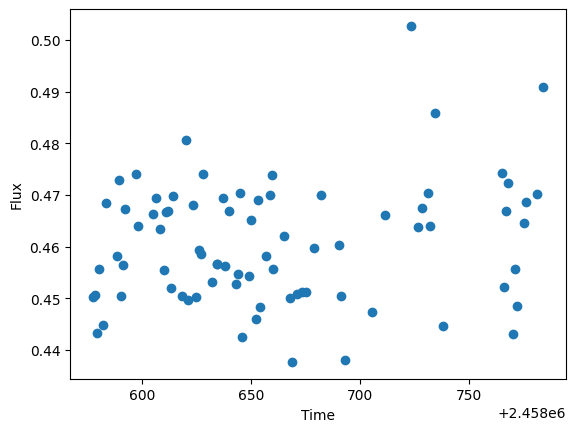

In [15]:
dropped = df.drop([30,63]) # use this one
dropped.where(df['JD_UTC'] < 2.4e6).dropna()

time = dropped['JD_UTC']
flux = dropped['av_rel_flux T1']
error = dropped['std_T1']
plt.scatter(time, flux)
plt.xlabel('Time')
plt.ylabel('Flux')


    

dropped.where(df['av_rel_flux T1'] > .575).dropna()

In [ ]:
#scipy for curve fitting

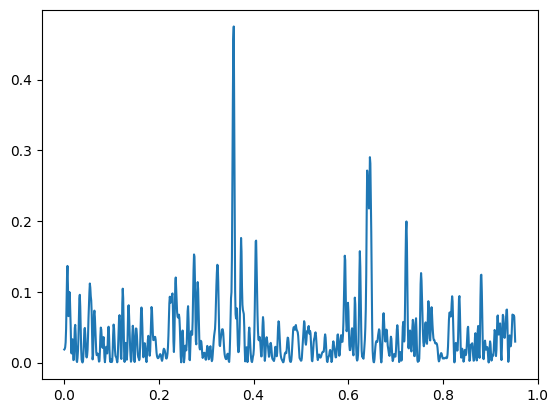

In [44]:
time = dropped['JD_UTC'] * u.day
flux = dropped['av_rel_flux T1'] * u.mag
error = dropped['std_T1'] * u.mag

f, p = LombScargle(time, flux, dy=error).autopower()

plt.plot(f, p)

In [18]:
dropped.where(df['av_rel_flux T1'] > .575).dropna()

,Cadence (Burst),JD_UTC,av_rel_flux T1,av_rel_flux C2,av_rel_flux C3,av_rel_flux C4,av_rel_flux C5,std_T1,std_C2,std_C3,std_C4,std_C5,CoV T1,CoV C2,CoV C3,CoV C4,CoV C5


In [20]:
df_2 = pd.read_csv('Master_Data_2.csv')

In [21]:
df_2

,Cadence (Burst),JD_UTC,av_rel_flux T1,av_rel_flux C2,av_rel_flux C3,av_rel_flux C4,av_rel_flux C5,std_T1,std_C2,std_C3,std_C4,std_C5,CoV T1,CoV C2,CoV C3,CoV C4,CoV C5
0,9-1,2458634.522,0.456628,0.233339,0.339823,0.326439,0.451546,0.002471,0.000887,0.002142,0.002114,0.002726,0.54115,0.37997,0.63035,0.64751,0.60380
1,1-2,2458577.078,0.450170,0.228931,0.339605,0.335194,0.447539,0.002006,0.001622,0.002960,0.003196,0.003580,0.44550,0.70851,0.87161,0.95335,0.80001
2,1-3,2458578.134,0.450683,0.228680,0.340786,0.331198,0.451231,0.003543,0.001859,0.002193,0.002973,0.004438,0.78622,0.81300,0.64345,0.89761,0.98360
3,1-4,2458579.073,0.443331,0.227401,0.341038,0.337236,0.445611,0.002052,0.001855,0.004357,0.002738,0.004142,0.46282,0.81586,1.27755,0.81188,0.92961
4,1-5,2458580.129,0.455698,0.230386,0.337893,0.331528,0.451841,0.001656,0.001190,0.001391,0.002025,0.002493,0.36350,0.51657,0.41154,0.61085,0.55166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,25-2,2458772.319,0.448605,0.228226,0.346733,0.314918,0.464618,0.002445,0.000960,0.001108,0.002206,0.002236,0.54492,0.42065,0.31969,0.70064,0.48121
77,25-5,2458775.310,0.464657,0.229137,0.344663,0.318101,0.461843,0.001035,0.001213,0.001444,0.001581,0.002703,0.22272,0.52943,0.41903,0.49709,0.58524
78,25-6,2458776.310,0.468700,0.231277,0.346630,0.313944,0.461648,0.001667,0.000976,0.001777,0.003936,0.003895,0.35564,0.42185,0.51270,1.25377,0.84377
79,26-3,2458781.313,0.470187,0.229390,0.346115,0.312454,0.467016,0.005155,0.004178,0.005852,0.011035,0.011951,1.09639,1.82156,1.69085,3.53160,2.55910


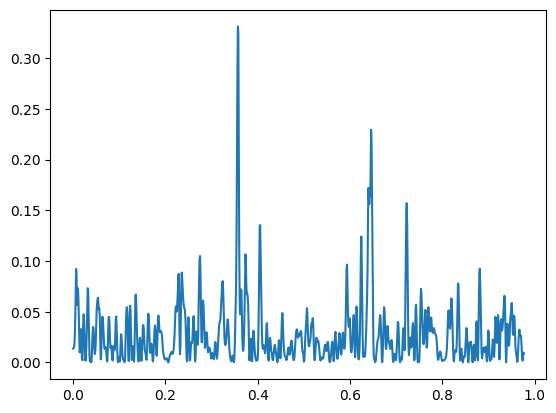

In [34]:
time = df_2['JD_UTC']
flux = df_2['av_rel_flux T1']
error = df_2['std_T1']

# add a sine wave to comp stars and try to reproduce artifacts
# target star with similar mag and add sine waves at same period as cyg x-1 as a simulation
# plot amplitude squared to alleviate negative power

frequency, power = LombScargle(time, flux, dy=error).autopower()
max_power_df_2 = frequency[np.argmax(power)]  #returns value in frequency array where power is maximum
plt.plot(frequency, power)

In [33]:
max_power_df_2

0.3573426438540204

In [23]:
sub_p = pd.read_csv('Master_Data_SubPercent.csv')

In [24]:
sub_p

,Cadence (Burst),JD_UTC,av_rel_flux T1,av_rel_flux C2,av_rel_flux C3,av_rel_flux C4,av_rel_flux C5,std_T1,std_C2,std_C3,std_C4,std_C5,CoV T1,CoV C2,CoV C3,CoV C4,CoV C5
0,9-1,2458634.522,0.456628,0.233339,0.339823,0.326439,0.451546,0.002471,0.000887,0.002142,0.002114,0.002726,0.54115,0.37997,0.63035,0.64751,0.60380
1,1-2,2458577.078,0.450170,0.228931,0.339605,0.335194,0.447539,0.002006,0.001622,0.002960,0.003196,0.003580,0.44550,0.70851,0.87161,0.95335,0.80001
2,1-3,2458578.134,0.450683,0.228680,0.340786,0.331198,0.451231,0.003543,0.001859,0.002193,0.002973,0.004438,0.78622,0.81300,0.64345,0.89761,0.98360
3,1-5,2458580.129,0.455698,0.230386,0.337893,0.331528,0.451841,0.001656,0.001190,0.001391,0.002025,0.002493,0.36350,0.51657,0.41154,0.61085,0.55166
4,1-6,2458582.084,0.444742,0.229150,0.343507,0.331258,0.447313,0.001668,0.000677,0.001481,0.002146,0.002117,0.37506,0.29556,0.43118,0.64789,0.47336
5,1-7,2458583.062,0.468402,0.227647,0.339019,0.336703,0.448226,0.002702,0.000909,0.002671,0.001980,0.003198,0.57689,0.39940,0.78780,0.58796,0.71349
6,2-1,2458588.105,0.458164,0.228148,0.337959,0.331605,0.454798,0.001376,0.001231,0.002036,0.001133,0.001965,0.30025,0.53958,0.60235,0.34167,0.43208
7,2-2,2458589.132,0.472849,0.230992,0.338817,0.326235,0.456242,0.002126,0.000892,0.001412,0.002660,0.001972,0.44967,0.38623,0.41668,0.81548,0.43225
8,2-3,2458590.116,0.450350,0.230814,0.339740,0.329479,0.451512,0.003151,0.000832,0.001215,0.002205,0.002620,0.69968,0.36064,0.35766,0.66933,0.58033
9,2-4,2458591.100,0.456375,0.231722,0.341356,0.328269,0.449798,0.001974,0.000789,0.002041,0.001203,0.001656,0.43244,0.34040,0.59781,0.36656,0.36824


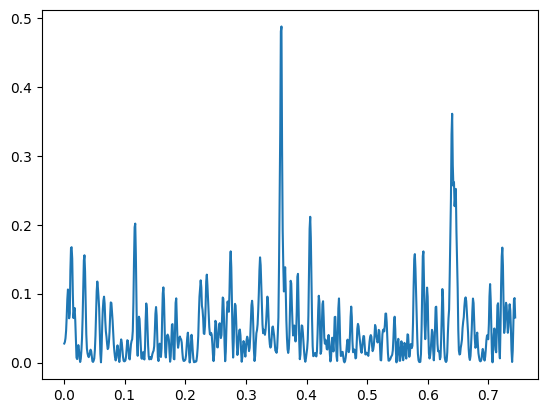

In [30]:
time = sub_p['JD_UTC']
flux = sub_p['av_rel_flux T1']
error = sub_p['std_T1']

# add a sine wave to comp stars and try to reproduce artifacts
# target star with similar mag and add sine waves at same period as cyg x-1 as a simulation
# plot amplitude squared to alleviate negative power

frequency, power = LombScargle(time, flux, dy=error).autopower()
max_power_sub_p = frequency[np.argmax(power)]  
plt.plot(frequency, power)

In [31]:
max_power_sub_p

0.35867064853331515

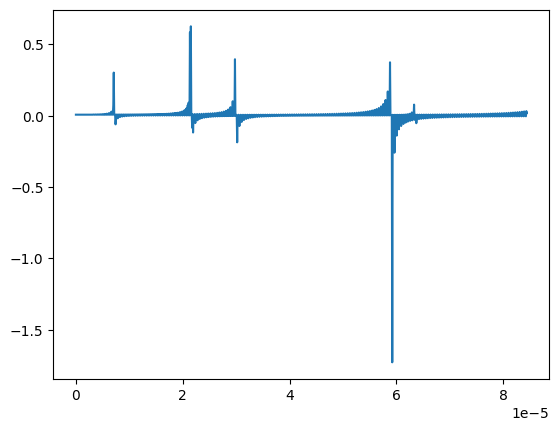

In [46]:
time = df['JD_UTC'] * u.day
flux = df['av_rel_flux T1']
error = df['std_T1']

# add a sine wave to comp stars and try to reproduce artifacts
# target star with similar mag and add sine waves at same period as cyg x-1 as a simulation
# plot amplitude squared to alleviate negative power

frequency, power = LombScargle(time, flux, dy=error).autopower()
max_power = frequency[np.argmax(power)]  
min_power = frequency[np.argmin(power)]  
plt.plot(frequency, power)

In [47]:
best_frequency = frequency[np.argmax(power)]
t_fit = np.linspace(0, 1)
ls = LombScargle(time, flux, error)
y_fit = ls.model(t_fit, best_frequency)

In [50]:
theta = ls.model_parameters(best_frequency)
theta.round(2)

array([-0.07,  0.06,  0.09])

In [51]:
offset = ls.offset()
design_matrix = ls.design_matrix(best_frequency, t_fit)
np.allclose(y_fit, offset + design_matrix.dot(theta))

True

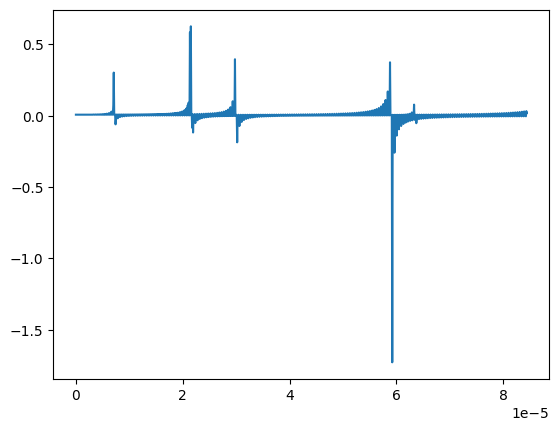

In [53]:
time = df['JD_UTC'] * u.day
flux = df['av_rel_flux T1']
error = df['std_T1']

# add a sine wave to comp stars and try to reproduce artifacts
# target star with similar mag and add sine waves at same period as cyg x-1 as a simulation
# plot amplitude squared to alleviate negative power

frequency, power = LombScargle(time, flux, dy=error).autopower()
max_power = frequency[np.argmax(power)]  
min_power = frequency[np.argmin(power)]  
plt.plot(frequency, power)

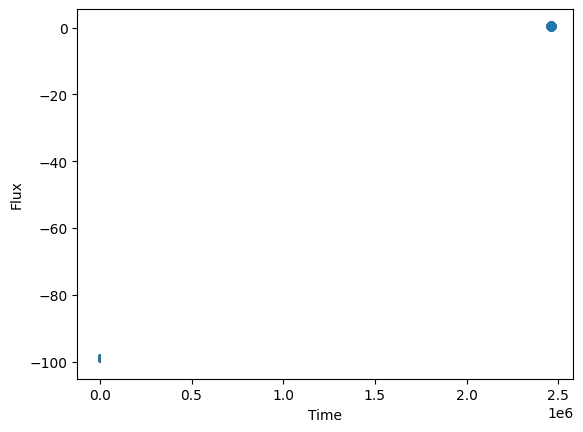

In [78]:
dropped = df.drop([30,63]) # use this one
dropped.where(df['JD_UTC'] < 2.4e6).dropna()

time = dropped['JD_UTC']
flux = dropped['av_rel_flux T1']
error = dropped['std_T1']
plt.scatter(time, flux)
plt.xlabel('Time')
plt.ylabel('Flux')


# Curve fit with pandas instead of 

dropped.where(df['av_rel_flux T1'] > .575).dropna()
plt.plot(sine(1, -99.10665024, -85.56014721, -99.10661525, time))

In [99]:
# scipy curve fitting
def sine(a, b, c, d, x):
    return a*np.sin(b*(x-c)) + d
    
params, _ = sp.curve_fit(sine, time, flux, p0 = [.02, 50, 550, .44])

In [100]:
time = np.array(time)
flux = np.array(flux)

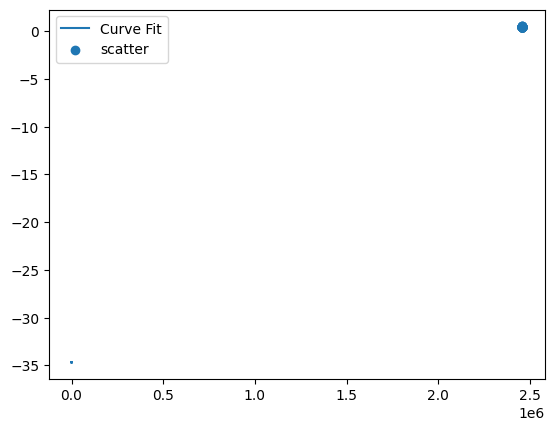

In [109]:
plt.plot(sine(params[0], params[1], params[2], params[3], time), label = "Curve Fit")
plt.scatter(time, flux, label= "scatter")
plt.legend()